In [427]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from framework_pkg.framework import FrameWork
from framework_pkg.survival_probablity import MSW

plt.rcParams['text.usetex']=True
plt.style.use('classic')

param ={'SinT12'  : 0.308 ,
        'T13'  : 8.57, 
        'mu1'  : 0.,
        'mu2'  : 0., 
        'mu3'  : 0.  ,
        'mdm'  : 5e-2 , 
        'alpha': 0.  ,
        'eps' : 0.  ,
        'alpha_eps' : 0.  ,
        'M12'  : 6.9e-5 }


frame_predicted_total_signal  = FrameWork(threshold=4.5,
                                        efficiency_correction=True,
                                        resolution_correction=False,
                                    )

msw_signal_fraction = frame_predicted_total_signal.__getitem__(param) 

#p_msw = np.mean(frame_predicted_total_signal.p_msw,axis=0)

data = np.loadtxt('./Data/modulation_data.txt')
annual_data = np.array(pd.read_csv('./Data/plot-data.csv'))

In [428]:
def PULDM(t, t_p, mu_tilde, m, alpha, eps, alpha_eps):
    theta_p = 2 * np.pi * (t - t_p)
    puldm = (1 - eps**2 * np.cos(theta_p - alpha_eps)**2) * np.sin(m * t * 1.31e20 * 365.25  + alpha)**2 
    return puldm[:,np.newaxis] * mu_tilde**2


def PULDM_exact(t, t_p, mu_tilde, m, alpha, eps, alpha_eps):
    theta_p = 2 * np.pi * (t - t_p)
    puldm = np.sqrt(1 - eps**2 * np.cos(theta_p - alpha_eps)**2) * np.sin(m * t * 1.31e20 * 365.25  + alpha)
    return 1 - np.cos(puldm[:,np.newaxis] * mu_tilde)**2 


t = frame_predicted_total_signal.time_weights

I_evolved, mass_weights = MSW(param, frame_predicted_total_signal.energy_nu)

mean_I_evolved = np.zeros(((t.shape[0], mass_weights.shape[0], 3)))
for i in range(3):
    #mean_I_evolved[:,:,i] = (t[:,np.newaxis,2] * I_evolved[np.newaxis,:,i,0] + t[:,np.newaxis,3] * I_evolved[np.newaxis,:,i,1]) / (t[:,np.newaxis,2] + t[:,np.newaxis,3] )
    mean_I_evolved[:,:,i] = I_evolved[np.newaxis,:,i,0]

p_msw = np.sum(mean_I_evolved * mass_weights, axis=2)


m = 1e-23
alpha = 0
eps = 1
alpha_eps = np.pi/2
t_p = - 257 / 365.25
mu_tilde = np.array([0.5, 0.5, 0])

p_uldm = PULDM(t[:,1]/365.25, t_p, mu_tilde, m, alpha, eps, alpha_eps)
p_uldm_exact = PULDM_exact(t[:,1]/365.25, t_p, mu_tilde, m, alpha, eps, alpha_eps)



p_ee = np.zeros((t.shape[0], mass_weights.shape[0]))
p_ee_exact = np.zeros((t.shape[0], mass_weights.shape[0]))
for i in range(mass_weights.shape[0]):
    p_ee[:,i] = np.sum( (1 - p_uldm) * mean_I_evolved[:,i] * mass_weights[i], axis=1)
    p_ee_exact[:,i] = np.sum( (1 - p_uldm_exact) * mean_I_evolved[:,i] * mass_weights[i], axis=1)


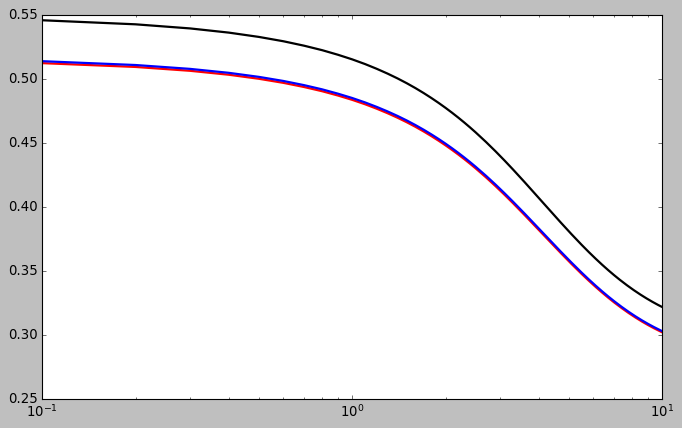

In [429]:
plt.figure(figsize=(10,6))
plt.xscale('log')
#plt.ylim(0.2,0.6)

plt.xlim(0.1,10)

plt.plot(frame_predicted_total_signal.energy_nu, np.mean(p_msw,axis=0), lw=2,ls='-',color='k')
plt.plot(frame_predicted_total_signal.energy_nu, np.mean(p_ee,axis=0), lw=2,ls='-',color='r')
plt.plot(frame_predicted_total_signal.energy_nu, np.mean(p_ee_exact,axis=0),lw=2,ls='-',color='b')


#plt.plot(frame_predicted_total_signal.energy_nu, np.min(p_ee,axis=0),lw=2,ls='-')



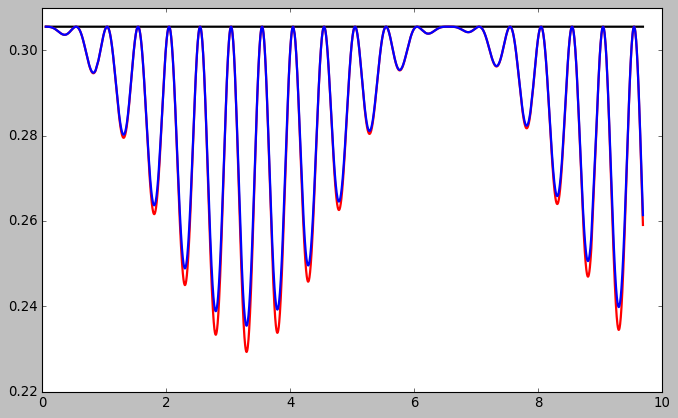

In [430]:
plt.figure(figsize=(10,6))
# plt.xscale('log')
# plt.ylim(0.2,0.6)
# plt.xlim(0.1,10)

plt.plot(t[:,1]/365.25,p_msw[:,-1],lw=2,ls='-',color='k')
plt.plot(t[:,1]/365.25,p_ee[:,-1],lw=2,ls='-',color='r')
plt.plot(t[:,1]/365.25,p_ee_exact[:,-1],lw=2,ls='-',color='b')

In [ ]:
# param ={'SinT12'  : 0.308 ,
#         'T13'  : 8.57, 
#         'mu1'  : 0.,
#         'mu2'  : 0.005, 
#         'mu3'  : 0.  ,
#         'mdm'  : 5e-2 , 
#         'alpha': 0.  ,
#         'eps' : 0.5  ,
#         'alpha_eps' : 0.  ,
#         'M12'  : 6.9e-5 }

# enu = np.logspace(-1,1,100)
# eta = np.array([3*np.pi/4])
# depth = 0

# frame_predicted_total_signal  = FrameWork(threshold=4.5,
#                                         efficiency_correction=True,
#                                         resolution_correction=False,
#                                     )

# _, theta, distance, days= frame_predicted_total_signal._variable_maker()

# #survival_probablity_msw = MSW(param, enu, eta, depth)
# survival_probablity_uldm, _ = ULDM(param, enu, eta, theta, distance, days, depth)

# plt.figure(figsize=(10,6))
# plt.xscale('log')
# plt.ylim(0.2,0.6)
# #plt.plot(enu, survival_probablity_msw[0], lw=2, color='k')
# plt.plot(enu, np.mean(survival_probablity_uldm[:,0,:],axis=0), lw=2, color='r')



# param ={'SinT12'  : 0.308 ,
#         'T13'  : 8.57, 
#         'mu1'  : 0.,
#         'mu2'  : 0.005, 
#         'mu3'  : 0.  ,
#         'mdm'  : 5e-2 , 
#         'alpha': 45.  ,
#         'eps' : 0.5  ,
#         'alpha_eps' : 0.  ,
#         'M12'  : 6.9e-5 }

# survival_probablity_uldm, _ = ULDM(param, enu, eta, theta, distance, days, depth)

# plt.plot(enu, np.mean(survival_probablity_uldm[:,0,:],axis=0), lw=2, color='g')

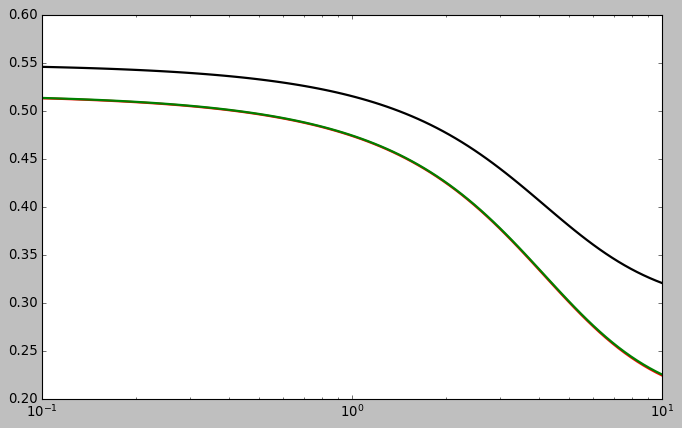

In [ ]:
# param ={'SinT12'  : 0.308 ,
#         'T13'  : 8.57, 
#         'mu1'  : 0.,
#         'mu2'  : 5., 
#         'mu3'  : 0.  ,
#         'mdm'  : 1e-1 , 
#         'alpha': 0  ,
#         'eps' : 0.  ,
#         'alpha_eps' : 0.  ,
#         'M12'  : 6.9e-5 }

# enu = np.logspace(-1,1,100)
# eta = np.array([3*np.pi/4])
# depth = 0

# frame_predicted_total_signal  = FrameWork(threshold=4.5,
#                                         efficiency_correction=True,
#                                         resolution_correction=False,
#                                         first_day='2015,1,1',
#                                         last_day='2016,1,1'
#                                     )

# _, theta, distance, days= frame_predicted_total_signal._variable_maker()

# survival_probablity_msw = MSW(param, enu, eta, depth)
# survival_probablity_uldm, _ = ULDM(param, enu, eta, theta, distance, days, depth)

# plt.figure(figsize=(10,6))
# plt.xscale('log')
# plt.ylim(0.2,0.6)
# plt.plot(enu, survival_probablity_msw[0], lw=2, color='k')
# plt.plot(enu, np.mean(survival_probablity_uldm[:,0,:],axis=0), lw=2, color='r')



# param ={'SinT12'  : 0.308 ,
#         'T13'  : 8.57, 
#         'mu1'  : 0.,
#         'mu2'  : 5., 
#         'mu3'  : 0.  ,
#         'mdm'  : 1e-1 , 
#         'alpha': 45  ,
#         'eps' : 0.  ,
#         'alpha_eps' : 0.  ,
#         'M12'  : 6.9e-5 }

# survival_probablity_uldm, _ = ULDM(param, enu, eta, theta, distance, days, depth)

# plt.plot(enu, np.mean(survival_probablity_uldm[:,0,:],axis=0), lw=2, color='g')

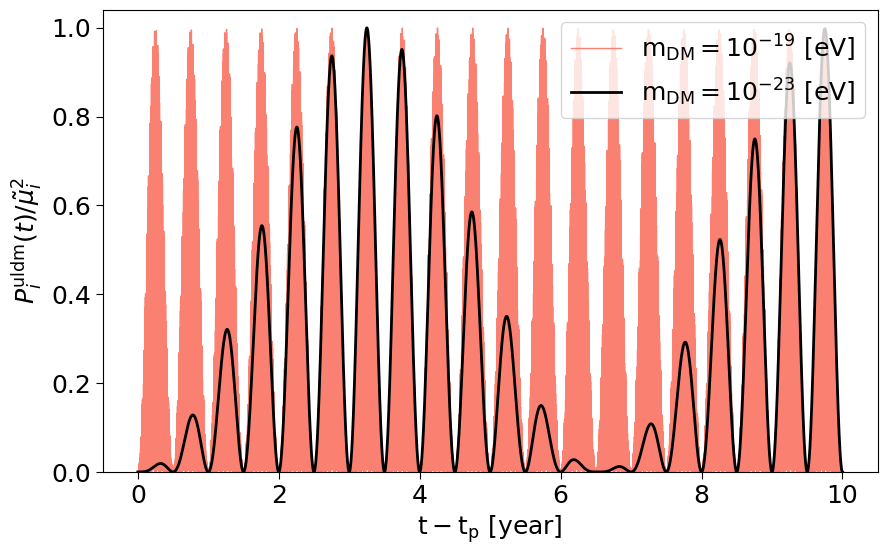

In [ ]:
days = np.arange(0,10,0.001)

plt.rcParams.update({'font.size': 18})
plt.rcParams['axes.formatter.useoffset'] = False

fig  = plt.figure(figsize=(10,6))
fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(wspace=0.1)

ax1 = fig.add_subplot(111)

ax1.set_ylim(0.,1.04)
#ax1.set_xlim(-0.02,1.02)
ax1.tick_params(axis='both', which='minor', length=4)
ax1.tick_params(axis='both', which='major', length=5)
#ax1.set_xlabel(r'$E_\nu \ \rm [MeV]$',fontsize=18)
ax1.set_ylabel(r'$ P_i^{\text{uldm}}(t)/ \tilde{\mu}_i^2 $',fontsize=18)
ax1.set_xlabel(r'${\rm t-t_p} \ \rm [year]$',fontsize=18)
#ax1.xaxis.set_major_formatter(plt.NullFormatter())

ax1.plot(days, PULDM(days, 1e-19, 0, 1, 1, 0), lw=1, color='salmon', label=r'$\rm m_{DM} = 10^{-19} \ [eV]$')
ax1.plot(days, PULDM(days, 1e-23, 0, 1, 1, 0), lw=2, color='k', label=r'$\rm m_{DM} = 10^{-23} \ [eV]$')
#ax1.plot(days, PULDM(days, 1e-23, 0, 1, 1, 0),ls='-', lw=2, color='g')



plt.legend(loc='upper right')

# param['mdm'] = 1e-2
# param['mu2'] = 1e-7

# param['alpha'] = 45
# mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
#                                     - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
# uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
# ax1.plot(days,uldm_term2, lw=2, color='b')

# param['alpha'] = 90
# mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
#                                     - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
# uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
# ax1.plot(days, uldm_term2, lw=2, color='r')

# param['alpha'] = 135
# mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
#                                     - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
# uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
# ax1.plot(days, uldm_term2, lw=2, color='g')
# ax1.text(0.0, 1.06, r'$\rm \mu = 10^{-7} \ [GeV^{-1}], $', fontsize=16)
# ax1.text(0.55, 1.06, r'$\rm m_{dm} = 10^{-22} \ [eV] $', fontsize=16)


# ax2 = fig.add_subplot(222)
# ax2.set_ylim(0.76,1.04)
# ax2.set_xlim(-0.02,1.02)
# ax2.tick_params(axis='both', which='minor', length=4)
# ax2.tick_params(axis='both', which='major', length=5)
# #ax1.set_xlabel(r'$E_\nu \ \rm [MeV]$',fontsize=18)
# #ax2.set_ylabel(r'$ \bar{P}^{B8}_{ee} $',fontsize=22)
# ax2.yaxis.set_major_formatter(plt.NullFormatter())
# ax2.xaxis.set_major_formatter(plt.NullFormatter())

# ax2.plot(days, 1 / distance**2, lw=2, color='k')
# param['mdm'] = 1e0
# param['mu2'] = 1e-7

# param['alpha'] = 45
# mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
#                                     - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
# uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
# ax2.plot(days, uldm_term2, lw=2, color='b')

# param['alpha'] = 90
# mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
#                                     - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
# uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
# ax2.plot(days, uldm_term2, lw=2, color='r')

# param['alpha'] = 135
# mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
#                                     - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
# uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
# ax2.plot(days, uldm_term2, lw=2, color='g')
# ax2.text(0.0, 1.06, r'$\rm \mu = 10^{-7} \ [GeV^{-1}], $', fontsize=16)
# ax2.text(0.55, 1.06, r'$\rm m_{dm} = 10^{-21} \ [eV] $', fontsize=16)

# ax3 = fig.add_subplot(223)

# ax3.set_ylim(0.76,1.04)
# ax3.set_xlim(-0.02,1.02)
# ax3.tick_params(axis='both', which='minor', length=4)
# ax3.tick_params(axis='both', which='major', length=5)
# ax3.set_xlabel(r'${\rm time} \ \rm [year]$',fontsize=18)
# ax3.set_ylabel(r'$ P_{ee}(t,E_{\nu})/ P_{ee}(E_{\nu}) $',fontsize=18)
# #ax1.xaxis.set_major_formatter(plt.NullFormatter())

# ax3.plot(days, 1 / distance**2, lw=2, color='k', label=r'$ \rm MSW $')

# param['mdm'] = 1e1
# param['mu2'] = 1e-7

# param['alpha'] = 45
# mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
#                                     - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
# uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
# ax3.plot(days,uldm_term2, lw=2, color='b', label=r'$ \alpha = 45 $')

# param['alpha'] = 90
# mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
#                                     - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
# uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
# ax3.plot(days, uldm_term2, lw=2, color='r', label=r'$ \alpha = 90 $')

# param['alpha'] = 135
# mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
#                                     - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
# uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
# ax3.plot(days, uldm_term2, lw=2, color='g', label=r'$ \alpha = 135 $')
# ax3.text(0.0, 1.06, r'$\rm \mu = 10^{-7} \ [GeV^{-1}], $', fontsize=16)
# ax3.text(0.55, 1.06, r'$\rm m_{dm} = 10^{-20} \ [eV] $', fontsize=16)
# plt.legend(loc='lower left', fontsize=16)

# ax4 = fig.add_subplot(224)
# ax4.set_ylim(0.76,1.04)
# ax4.set_xlim(-0.02,1.02)
# ax4.tick_params(axis='both', which='minor', length=4)
# ax4.tick_params(axis='both', which='major', length=5)
# ax4.set_xlabel(r'${\rm time} \ \rm [year]$',fontsize=18)
# #ax2.set_ylabel(r'$ \bar{P}^{B8}_{ee} $',fontsize=22)
# ax4.yaxis.set_major_formatter(plt.NullFormatter())

# ax4.plot(days, 1 / distance**2, lw=2, color='k')
# param['mdm'] = 1e4
# param['mu2'] = 1e-7

# param['alpha'] = 45
# mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
#                                     - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
# uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
# ax4.plot(days, uldm_term2, lw=2, color='b')

# param['alpha'] = 90
# mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
#                                     - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
# uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
# ax4.plot(days, uldm_term2, lw=2, color='r')

# param['alpha'] = 135
# mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
#                                     - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
# uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
# #ax4.plot(days, uldm_term2, lw=2, color='g')
# ax4.text(0.0, 1.06, r'$\rm \mu = 10^{-7} \ [GeV^{-1}], $', fontsize=16)
# ax4.text(0.55, 1.06, r'$\rm m_{dm} = 10^{-17} \ [eV] $', fontsize=16)

plt.savefig('./PULDM.pdf', bbox_inches='tight')

0.0
50
day lenght: 24
0.1
50
day lenght: 24
0.2
33
day lenght: 7.68
0.3
18
day lenght: 4.08
0.4
0
day lenght: 0
0.5
0
day lenght: 0


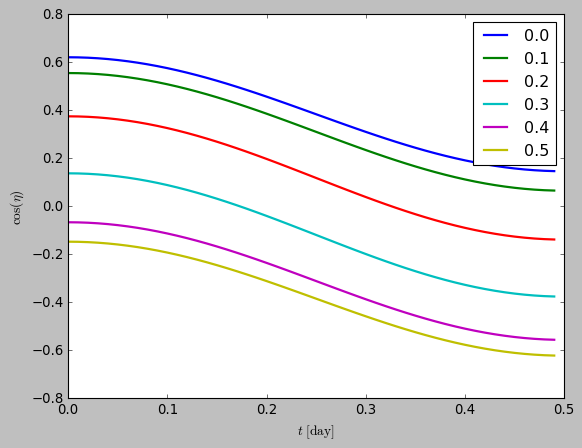

In [426]:
lam = [75]
t_year = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5 ])
sin_deltas = - np.sin(0.4091) * np.cos(2 * np.pi * t_year)
cos_deltas = np.sqrt(1 - sin_deltas**2)
t_day = np.arange(0,0.5,0.01)

#labels= [r'$\rm Jan$', r'$\rm Jun$', r'$\rm s$']
for j in range(len(lam)):
    for i in range(len(sin_deltas)):
        cos_lam = np.cos(np.radians(lam[j]))
        sin_lam = np.sin(np.radians(lam[j]))

        cos_eta = cos_lam * cos_deltas[i] * np.cos(2 * np.pi * t_day) - sin_lam * sin_deltas[i]

        print(t_year[i])

        print(len(t_day[cos_eta>=0]))
        # if len(t_day[cos_eta>=0]) == len(t_day):
        #     print('day lenght:', 0)
        # elif  0 < len(t_day[cos_eta>=0]) < len(t_day)  : 
        #     print('day lenght:', 24 - t_day[cos_eta>=0][-1]*24*2)
        # else:
        #     print('day lenght:', 24)

        if len(t_day[cos_eta>=0]) == len(t_day):
            print('day lenght:', 24)
        elif  0 < len(t_day[cos_eta>=0]) < len(t_day)  : 
            print('day lenght:', t_day[cos_eta>=0][-1]*24)
        else:
            print('day lenght:', 0)
              
              
              
             
        # print('night lenght:', t_day[cos_eta>=0][-1]*24*2)

        #print(np.min(cos_lam * cos_deltas[i] * np.cos(2 * np.pi * np.arange(0,1,0.01)) - sin_lam * sin_deltas[i]))
        #print(np.max(cos_lam * cos_deltas[i] * np.cos(2 * np.pi * np.arange(0,1,0.01)) - sin_lam * sin_deltas[i]))
        
        plt.plot(t_day, cos_eta , lw=2, label=str(t_year[i]))
        
        


plt.ylabel(r'$\cos(\eta)$')
plt.xlabel(r'$t  \rm \ [day]$')

plt.legend()


#plt.savefig('./matter_exposure.pdf', bbox_inches='tight')
#plt.plot(np.arange(0,1,0.001), np.sqrt(1 - sin_deltas**2))
#plt.plot(np.arange(0,1,0.001), - sin_deltas)



11.999891999485943 11.999879999279996
12.000372002365996 12.000120000720004
11.999891999494045 11.999879999279996
12.0003720023741 12.000120000720004
11.999891999485943 11.999879999279996
12.000372002365996 12.000120000720004


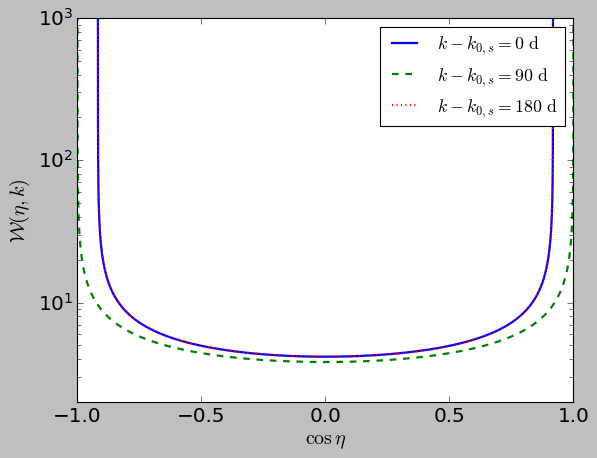

In [548]:
#eta = np.arange(np.pi/2, np.pi, 0.001)

#cos_eta = np.arange(-1, 1, 0.001)


def func(lat, year):
    sin_deltas = - np.sin(0.4091) * np.cos(2 * np.pi * year)
    cos_deltas = np.sqrt(1 - sin_deltas**2)
    
    cos_lam = np.cos(np.radians(lat))
    sin_lam = np.sin(np.radians(lat))

    t = np.linspace(0+1e-6, 0.5-1e-6, int(1e5))

    cos_eta = cos_lam * cos_deltas * np.cos(2 * np.pi * t) - sin_lam * sin_deltas
    sin_t = np.sin(2 * np.pi * t)

    if len(t[cos_eta>=0]) == len(t):
        T_day = 0
        T_night = 24
        ind = -1
    elif  0 < len(t[cos_eta>=0]) < len(t)  : 
        T_day =  24 - 2*t[cos_eta>=0][-1]*24
        T_night = 2*t[cos_eta>=0][-1]*24
        ind = np.argwhere(cos_eta>=0)[-1][0]
        
    else:
        T_day = 24
        T_night = 0
        ind = 0

    dt_dcos_eta = 12 / ( np.pi * cos_lam * cos_deltas * sin_t )

    return dt_dcos_eta, cos_eta, ind, T_day, T_night


plt.rcParams.update({'font.size': 18})
plt.rcParams['axes.formatter.useoffset'] = False

plt.figure(figsize=(8,6))

plt.tick_params(axis='both', which='major', length=5)
plt.tick_params(axis='both', which='minor', length=4)
plt.yscale('log')
plt.ylim(2,1e3)

plt.xlabel(r'$\cos\eta$')
plt.ylabel(r'$\mathcal{W}(\eta,k)$')


dt_dcos_eta, cos_eta, ind, T_day, T_night  = func(0, 0)
plt.plot(cos_eta, dt_dcos_eta, lw=2, ls='-', label=r'$k-k_{0,s} = 0 \ \rm d$')
print(-2 * np.trapz(dt_dcos_eta[:ind], cos_eta[:ind]), T_night)
print(-2 * np.trapz(dt_dcos_eta[ind:], cos_eta[ind:]), T_day)

dt_dcos_eta, cos_eta, ind, T_day, T_night = func(0, 0.25)
plt.plot(cos_eta, dt_dcos_eta, lw=2, ls='--', label=r'$k-k_{0,s} = 90 \ \rm d$')
print(-2 * np.trapz(dt_dcos_eta[:ind], cos_eta[:ind]), T_night)
print(-2 * np.trapz(dt_dcos_eta[ind:], cos_eta[ind:]), T_day)

dt_dcos_eta, cos_eta, ind, T_day, T_night  = func(0, 0.5)
plt.plot(cos_eta, dt_dcos_eta, lw=2, ls=':', label=r'$k-k_{0,s} = 180 \ \rm d$')
print(-2 * np.trapz(dt_dcos_eta[:ind], cos_eta[:ind]), T_night)
print(-2 * np.trapz(dt_dcos_eta[ind:], cos_eta[ind:]), T_day)
plt.legend(loc='upper right', fontsize=16)

#plt.savefig('./w_keta.pdf', bbox_inches='tight')


In [391]:
import numpy as np
from scipy.integrate import quad

# Inverse mapping: cos_eta -> t
def t_from_cos_eta(cos_eta):
    return np.arccos((cos_eta + s1 * s2) / (c1 * c2))

# Define the integrand
def safe_integrand(cos_eta):
    t = t_from_cos_eta(cos_eta)
    sin_t = np.sin(t)
    if np.abs(sin_t) < 1e-10:
        return 0  # Avoid division by very small numbers
    return -1.0 / (c1 * c2 * sin_t)


for i in range(len(lam)):
    # Define constants
    s1 = - np.sin(0.4091) * np.cos(2 * np.pi * 0.5) 
    c1 = np.sqrt(1 - s1**2)
    
    c2 = np.cos(np.radians(lam[i]))
    s2 = np.sqrt(1 - c2**2)


    # Integration limits in cos_eta
    cos_eta0 = c1 * c2 * np.cos(2 * np.pi * 0.0) - s1 * s2
    cos_eta1 = c1 * c2 * np.cos(2 * np.pi * 0.5) - s1 * s2

    result, error = quad(safe_integrand, cos_eta0, 0)
    print("Integral =", result/np.pi)
    result, error = quad(safe_integrand, 0, cos_eta1)
    print("Integral =", result/np.pi)

Integral = 0.4439524090824781
Integral = 0.5560475909174932
Integral = 0.3572566551099375
Integral = 0.642743344889227


Text(0.55, 1.06, '$\\rm m_{dm} = 10^{-17} \\ [eV] $')

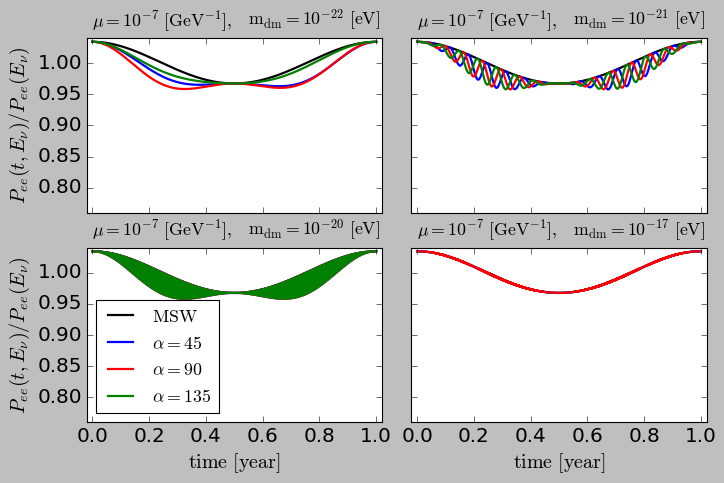

In [23]:
LIGHT_SPEED = 2.998 # 1e8 m/s
RHO_DM2  = np.sqrt(2 * 0.4 * 7.65) #e-21 GeV^2
ASTRO_UNIT    =  1.496 #1e11 m

frame_predicted_total_signal  = FrameWork(threshold=4.5,
                                        efficiency_correction=True,
                                        resolution_correction=False,
                                        first_day='2015,1,1',
                                        last_day='2016,1,1'
                                    )

_, theta, distance, days= frame_predicted_total_signal._variable_maker(dtheta=0.0005)
day_list  = days * 3.6525 * 2.4 * 6. * 6. / 6.6 # in 1e21 eV^-1
param['epsx'] = np.cos(0)
param['epsy'] = np.sin(0)
polar_vec = np.sqrt((1 - ( param['epsx'] * np.cos(theta) + param['epsy'] * np.sin(theta))**2))
#10^-24 ev order of 10 years, 
#10^-20 ev order of day

plt.rcParams.update({'font.size': 18})
plt.rcParams['axes.formatter.useoffset'] = False

fig  = plt.figure(figsize=(10,6))
fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(wspace=0.1)

ax1 = fig.add_subplot(221)

ax1.set_ylim(0.76,1.04)
ax1.set_xlim(-0.02,1.02)
ax1.tick_params(axis='both', which='minor', length=4)
ax1.tick_params(axis='both', which='major', length=5)
#ax1.set_xlabel(r'$E_\nu \ \rm [MeV]$',fontsize=18)
ax1.set_ylabel(r'$ P_{ee}(t,E_{\nu})/ P_{ee}(E_{\nu}) $',fontsize=18)
ax1.xaxis.set_major_formatter(plt.NullFormatter())

ax1.plot(days, 1 / distance**2, lw=2, color='k')

param['mdm'] = 1e-2
param['mu2'] = 1e-7

param['alpha'] = 45
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax1.plot(days,uldm_term2, lw=2, color='b')

param['alpha'] = 90
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax1.plot(days, uldm_term2, lw=2, color='r')

param['alpha'] = 135
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax1.plot(days, uldm_term2, lw=2, color='g')
ax1.text(0.0, 1.06, r'$\rm \mu = 10^{-7} \ [GeV^{-1}], $', fontsize=16)
ax1.text(0.55, 1.06, r'$\rm m_{dm} = 10^{-22} \ [eV] $', fontsize=16)


ax2 = fig.add_subplot(222)
ax2.set_ylim(0.76,1.04)
ax2.set_xlim(-0.02,1.02)
ax2.tick_params(axis='both', which='minor', length=4)
ax2.tick_params(axis='both', which='major', length=5)
#ax1.set_xlabel(r'$E_\nu \ \rm [MeV]$',fontsize=18)
#ax2.set_ylabel(r'$ \bar{P}^{B8}_{ee} $',fontsize=22)
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax2.xaxis.set_major_formatter(plt.NullFormatter())

ax2.plot(days, 1 / distance**2, lw=2, color='k')
param['mdm'] = 1e0
param['mu2'] = 1e-7

param['alpha'] = 45
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax2.plot(days, uldm_term2, lw=2, color='b')

param['alpha'] = 90
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax2.plot(days, uldm_term2, lw=2, color='r')

param['alpha'] = 135
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax2.plot(days, uldm_term2, lw=2, color='g')
ax2.text(0.0, 1.06, r'$\rm \mu = 10^{-7} \ [GeV^{-1}], $', fontsize=16)
ax2.text(0.55, 1.06, r'$\rm m_{dm} = 10^{-21} \ [eV] $', fontsize=16)

ax3 = fig.add_subplot(223)

ax3.set_ylim(0.76,1.04)
ax3.set_xlim(-0.02,1.02)
ax3.tick_params(axis='both', which='minor', length=4)
ax3.tick_params(axis='both', which='major', length=5)
ax3.set_xlabel(r'${\rm time} \ \rm [year]$',fontsize=18)
ax3.set_ylabel(r'$ P_{ee}(t,E_{\nu})/ P_{ee}(E_{\nu}) $',fontsize=18)
#ax1.xaxis.set_major_formatter(plt.NullFormatter())

ax3.plot(days, 1 / distance**2, lw=2, color='k', label=r'$ \rm MSW $')

param['mdm'] = 1e1
param['mu2'] = 1e-7

param['alpha'] = 45
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax3.plot(days,uldm_term2, lw=2, color='b', label=r'$ \alpha = 45 $')

param['alpha'] = 90
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax3.plot(days, uldm_term2, lw=2, color='r', label=r'$ \alpha = 90 $')

param['alpha'] = 135
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax3.plot(days, uldm_term2, lw=2, color='g', label=r'$ \alpha = 135 $')
ax3.text(0.0, 1.06, r'$\rm \mu = 10^{-7} \ [GeV^{-1}], $', fontsize=16)
ax3.text(0.55, 1.06, r'$\rm m_{dm} = 10^{-20} \ [eV] $', fontsize=16)
plt.legend(loc='lower left', fontsize=16)

ax4 = fig.add_subplot(224)
ax4.set_ylim(0.76,1.04)
ax4.set_xlim(-0.02,1.02)
ax4.tick_params(axis='both', which='minor', length=4)
ax4.tick_params(axis='both', which='major', length=5)
ax4.set_xlabel(r'${\rm time} \ \rm [year]$',fontsize=18)
#ax2.set_ylabel(r'$ \bar{P}^{B8}_{ee} $',fontsize=22)
ax4.yaxis.set_major_formatter(plt.NullFormatter())

ax4.plot(days, 1 / distance**2, lw=2, color='k')
param['mdm'] = 1e4
param['mu2'] = 1e-7

param['alpha'] = 45
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax4.plot(days, uldm_term2, lw=2, color='b')

param['alpha'] = 90
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax4.plot(days, uldm_term2, lw=2, color='r')

param['alpha'] = 135
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
#ax4.plot(days, uldm_term2, lw=2, color='g')
ax4.text(0.0, 1.06, r'$\rm \mu = 10^{-7} \ [GeV^{-1}], $', fontsize=16)
ax4.text(0.55, 1.06, r'$\rm m_{dm} = 10^{-17} \ [eV] $', fontsize=16)

#plt.savefig('./mu_mdm_01.pdf', bbox_inches='tight')

In [664]:
import os
import sys

from math import sin, asin, cos, sqrt, sqrt, pi, radians

# Get the current working directory
peanuts_path = os.path.abspath(os.path.join(os.getcwd(), "external", "PEANUTS"))

# Add PEANUTS to the Python path
sys.path.append(peanuts_path)

from peanuts.earth import EarthDensity
from peanuts.evolutor import FullEvolutor
from peanuts.pmns import PMNS
from peanuts.solar import SolarModel, solar_flux_mass

R_E = 6.371e6 # meters
depth = 1e3



path = os.getcwd()

#path = os.path.dirname(os.path.realpath(__file__))
parent_dir = os.path.dirname(path)
path = os.path.join(parent_dir,'NeuMod', 'external', 'PEANUTS')


density_file = path+'/Data/Earth_Density.csv' 
density = EarthDensity(density_file=density_file)


def func(th12, th13, DeltamSq21, lam=36):
    th23 = 0.85521
    d = 3.4034

    pmns = PMNS(th12, th13, th23, d)

    DeltamSq3l = 2.46e-3
    # Get arguments
    fraction = "8B"

    solar_file  = path+'/Data/bs2005agsopflux.csv'
    solar_model = SolarModel(solar_file)

    radius_profile = solar_model.radius()
    density_profile = solar_model.density()
    flux_distributin = solar_model.fraction(fraction)

    enu = np.linspace(10,12,100)

    mass_weights = np.zeros((enu.shape[0],3))
    eta = pi/2 * np.concatenate((np.linspace(0,1.05,1000), [1.1, 2]))

    evol = np.zeros((eta.shape[0], enu.shape[0], 3))
    for i in range(enu.shape[0]): 
        mass_weights[i] = solar_flux_mass(th12, th13, DeltamSq21, DeltamSq3l, enu[i], radius_profile, density_profile, flux_distributin)
        for j in range (len(eta)):
            evol_a = FullEvolutor(density, DeltamSq21, DeltamSq3l, pmns, enu[i], eta[j], depth, False)
            evol[j,i] = np.square(np.abs((evol_a @ pmns.pmns)))[0,:]
        
    t = np.linspace(0,0.05,100)

    t_year = np.linspace(0,0.5,180)
    
    evol_t = np.zeros((len(t_year), t.shape[0], enu.shape[0], 3))
    t_break = []
    for j in range(len(t_year)):
        sin_deltas = - np.sin(0.4091) * np.cos(2 * np.pi * t_year[j])
        cos_deltas = np.sqrt(1 - sin_deltas**2)
        cos_lam = np.cos(np.radians(lam))
        sin_lam = np.sin(np.radians(lam))

        cos_eta_t = cos_lam * cos_deltas * np.cos(2 * np.pi * t) - sin_lam * sin_deltas
        t_break.append(t[cos_eta_t >= np.cos( 1.0 * pi/2)][-1])
        for i in range(enu.shape[0]):
            for k in range(3):
                sorted_indices = np.argsort(np.cos(eta))
                evol_t[j,:,i,k] = np.interp(cos_eta_t, np.cos(eta)[sorted_indices], evol[:,i,k][sorted_indices])
    return t, evol_t, t_break, mass_weights, enu

[0.3008008008008008, 0.3008008008008008, 0.3008008008008008, 0.3008008008008008, 0.3008008008008008, 0.3003003003003003, 0.3003003003003003, 0.3003003003003003, 0.3003003003003003, 0.2997997997997998, 0.2997997997997998, 0.2997997997997998, 0.29929929929929927, 0.29929929929929927, 0.2987987987987988, 0.2987987987987988, 0.2982982982982983, 0.2977977977977978, 0.2977977977977978, 0.2972972972972973, 0.29679679679679677, 0.29679679679679677, 0.2962962962962963, 0.2957957957957958, 0.2952952952952953, 0.2947947947947948, 0.29429429429429427, 0.29429429429429427, 0.2937937937937938, 0.2932932932932933, 0.2927927927927928, 0.2922922922922923, 0.29179179179179177, 0.2907907907907908, 0.2902902902902903, 0.2897897897897898, 0.28928928928928926, 0.2887887887887888, 0.2882882882882883, 0.2877877877877878, 0.28678678678678676, 0.2862862862862863, 0.2857857857857858, 0.2852852852852853, 0.28428428428428426, 0.28378378378378377, 0.2832832832832833, 0.2822822822822823, 0.28178178178178176, 0.28078

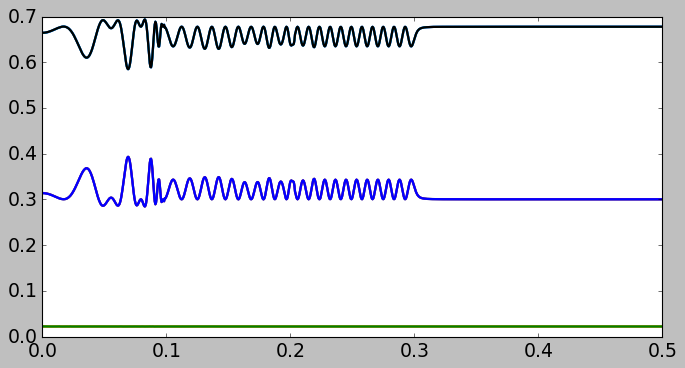

In [659]:
plt.rcParams.update({'font.size': 17})
plt.rcParams['axes.formatter.useoffset'] = False

fig  = plt.figure(figsize=(10,5))
#fig.subplots_adjust(hspace=0.2)
#fig.subplots_adjust(wspace=0.1)


############################################
th12 = np.arcsin(sqrt(0.307))
th13 = radians(8.52)
DeltamSq21 = 7.49e-5
t, evol_t, t_break, mass_weights, enu = func(th12, th13, DeltamSq21, 36)
print(t_break)
print(np.mean(evol_t[0,t<=t_break[0],-1,0]))
print(np.mean(evol_t[1,t<=t_break[1],-1,0]))
print(np.mean(evol_t[2,t<=t_break[1],-1,0]))


ax1 = fig.add_subplot(111)
ax1.plot(t, evol_t[0,:,-1,0],lw=2, ls='-')
ax1.plot(t, evol_t[0,:,-1,1],lw=2, ls='-')
ax1.plot(t, evol_t[0,:,-1,2],lw=2, ls='-')

ax1.plot(t, evol_t[1,:,-1,0],lw=2, ls='-')
ax1.plot(t, evol_t[1,:,-1,1],lw=2, ls='-')
ax1.plot(t, evol_t[1,:,-1,2],lw=2, ls='-')


ax1.plot(t, evol_t[2,:,-1,0],lw=2, ls='-')
ax1.plot(t, evol_t[2,:,-1,1],lw=2, ls='-')
ax1.plot(t, evol_t[2,:,-1,2],lw=2, ls='-')


# ############################################
# th12 = np.arcsin(sqrt(0.307))
# th13 = radians(8.52)
# DeltamSq21 = 1e-5
# t, evol_t = func(th12, th13, DeltamSq21)

# ax2 = fig.add_subplot(232)
# ax2.plot(t, evol_t[0,0,:,0],lw=2, ls='-')
# ax2.plot(t, evol_t[0,0,:,1],lw=2, ls='-')
# ax2.plot(t, evol_t[0,0,:,2],lw=2, ls='-')


# ############################################
# th12 = np.arcsin(sqrt(0.275))
# th13 = radians(8.52)
# DeltamSq21 = 7.49e-5
# t, evol_t = func(th12, th13, DeltamSq21)

# ax3 = fig.add_subplot(233)
# ax3.plot(t, evol_t[0,0,:,0],lw=2, ls='-')
# ax3.plot(t, evol_t[0,0,:,1],lw=2, ls='-')
# ax3.plot(t, evol_t[0,0,:,2],lw=2, ls='-')

# ############################################
# th12 = np.arcsin(sqrt(0.307))
# th13 = radians(8.52)
# DeltamSq21 = 7.49e-5
# t, evol_t = func(th12, th13, DeltamSq21)

# ax4 = fig.add_subplot(234)
# ax4.plot(t, evol_t[1,0,:,0],lw=2, ls='-')
# ax4.plot(t, evol_t[1,0,:,1],lw=2, ls='-')
# ax4.plot(t, evol_t[1,0,:,2],lw=2, ls='-')


# ############################################
# th12 = np.arcsin(sqrt(0.307))
# th13 = radians(8.52)
# DeltamSq21 = 1e-5
# t, evol_t = func(th12, th13, DeltamSq21)

# ax5 = fig.add_subplot(235)
# ax5.plot(t, evol_t[1,0,:,0],lw=2, ls='-')
# ax5.plot(t, evol_t[1,0,:,1],lw=2, ls='-')
# ax5.plot(t, evol_t[1,0,:,2],lw=2, ls='-')

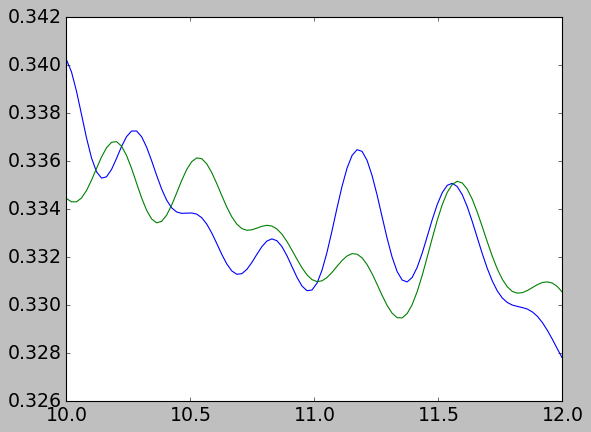

In [667]:
#t, evol_t_36, t_break, mass_weights, enu = func(th12, th13, DeltamSq21, 36)
#t, evol_t_42, t_break, mass_weights, enu = func(th12, th13, DeltamSq21, 42)



plt.plot(enu, np.sum(np.mean(evol_t_36[:,0,:,:],axis=0) * mass_weights, axis=1))
#plt.plot(enu, np.sum(np.mean(evol_t[:,-1,:,:],axis=0) * mass_weights, axis=1))



plt.plot(enu, np.sum(np.mean(evol_t_42[:,-1,:,:],axis=0) * mass_weights, axis=1))
#plt.plot(enu, np.sum(np.mean(evol_t[:,-1,:,:],axis=0) * mass_weights, axis=1))





#plt.plot(enu, np.sum(np.mean(evol_t[:,0,:,:],axis=0) * mass_weights, axis=1))

In [668]:
for i in range(len(t)):
    corr = np.corrcoef(np.sum(np.mean(evol_t_42[:,0,:,:],axis=0) * mass_weights, axis=1),
                   np.sum(np.mean(evol_t_36[:,i,:,:],axis=0) * mass_weights, axis=1))[0,1]
    print(corr)

0.189835314195721
0.18988837114145998
0.19004685846862268
0.19031252997306491
0.19068025948742648
0.19109283156781195
0.191611256872351
0.19223447784263137
0.19278369849848154
0.19308828946578982
0.1933612213132774
0.19401427756292583
0.19487416093902743
0.19579365412154864
0.1966124521993221
0.1974419220080242
0.19842695035059785
0.19939296673120155
0.20035328707186556
0.20160014450674466
0.20277381863456567
0.2038474473459824
0.20525280090068126
0.20690703928345772
0.20887352241185825
0.21085299280447986
0.21262587805392394
0.21527485187418371
0.21944423381215583
0.2236785727012964
0.22821204950979698
0.23234357205294845
0.2344693492379638
0.23687399396453254
0.2391917894333912
0.24031021556768295
0.24173666684933376
0.2423072885165598
0.24344114834370045
0.24428157975814857
0.24442053974479527
0.2467567987531531
0.24957960162687498
0.2520909110641707
0.2513728768833563
0.25028324130220797
0.24771478584282386
0.2440624874877775
0.23986582905562437
0.23552408901697938
0.23042546276965